In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.ones(shape=[3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [3]:
tf.zeros(shape=[2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [6]:
tf.random.uniform(shape=[5,5], minval = 0,maxval = 1, dtype = 'float32')

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.81110275, 0.28769374, 0.4245    , 0.23177338, 0.76872873],
       [0.90487885, 0.44339204, 0.8725952 , 0.4202993 , 0.03122175],
       [0.4961425 , 0.21255863, 0.845103  , 0.38880134, 0.2730441 ],
       [0.80871844, 0.9169866 , 0.97168696, 0.3657601 , 0.83735335],
       [0.02062833, 0.34416187, 0.5733881 , 0.61014974, 0.421849  ]],
      dtype=float32)>

In [8]:
tf.random.normal(shape = [5,5], mean = 0.0, stddev = 1., dtype='float32')

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 6.2607735e-02, -1.3284103e+00, -2.5009472e+00, -1.2501822e+00,
         1.6648477e-01],
       [-2.7108711e-01,  4.5138630e-01,  1.8978653e+00, -3.2065865e-01,
         4.7713205e-01],
       [ 2.5941578e-01, -2.0355834e-03,  2.1312355e-01,  1.2673012e+00,
         1.1846565e+00],
       [ 1.2627397e+00,  1.2195344e-02,  1.0949017e+00,  6.3657981e-01,
        -4.3901306e-01],
       [ 1.1400433e+00,  3.4888828e-01,  5.4201084e-01, -2.1427120e-01,
         1.3775505e+00]], dtype=float32)>

In [29]:
a = tf.Variable(initial_value = [[1,0],[0,1]], shape = [2,2])

In [30]:
tf.tile(a, [2,2], tf.int32)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1]])>

In [31]:
tf.fill([4,4], 10., tf.float32)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[10., 10., 10., 10.],
       [10., 10., 10., 10.],
       [10., 10., 10., 10.],
       [10., 10., 10., 10.]], dtype=float32)>

In [37]:
x = tf.Variable(initial_value = 3.)

In [38]:
with tf.GradientTape() as tape:
    y = tf.square(x)
    gradient = tape.gradient(y, x)
    

In [48]:
time = tf.Variable(initial_value = 0.)

In [49]:
# distance is h = 0.5*gt**2
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        distance = (tf.multiply(tf.square(time),4.9))
        inner_gradient = tape2.gradient(distance, time)
    outer_gradient = tape1.gradient(inner_gradient, time)

In [51]:
outer_gradient.numpy()

9.8

In [52]:
inner_gradient.numpy()

0.0

In [55]:
# using assign
a = tf.Variable(initial_value = tf.fill([2,2], 10.))

In [65]:
a[0,0].assign(100.)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[100.,  10.],
       [ 10.,  10.]], dtype=float32)>

In [67]:
a[0,1].assign(-100.)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 100., -100.],
       [  10.,   10.]], dtype=float32)>

In [72]:
a[1,:].assign([2,2])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 100., -100.],
       [   2.,    2.]], dtype=float32)>

In [75]:
a[0,:].assign([1,115])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[  1., 115.],
       [  2.,   2.]], dtype=float32)>

In [86]:
time.assign_sub(1)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [87]:
a = tf.Variable(tf.zeros(shape = (3,1)))

In [90]:
a.assign_add(tf.ones(shape = (3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [122]:
x1 = np.random.multivariate_normal(mean = [3.0,0.0], cov = [[1,0.5],[0.5,1]], size = 1000)
x2 = np.random.multivariate_normal(mean = [0.0,3.0], cov = [[1,0.5],[0.5,1]], size = 1000)

In [123]:
import matplotlib.pyplot as plt

In [128]:
inputs = np.vstack((x1,x2)).astype('float32')

In [131]:
y1 = np.zeros(shape = (1000,1), dtype='float32')
y2 = np.ones(shape = (1000,1), dtype='float32')

In [132]:
targets = np.vstack((y1, y2))

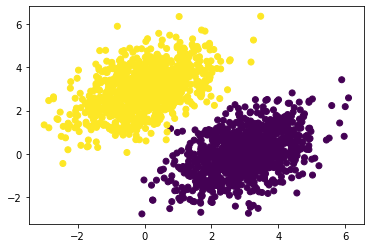

In [135]:
plt.scatter(inputs[:,0], inputs[:,1],c = targets[:,0])

In [158]:
input_dim = 2
output_dim= 1

w = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)), dtype= tf.float32)
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)), dtype = tf.float32)

In [159]:
def model(inputs):
    return tf.add(tf.matmul(inputs, w),b)

In [160]:
def loss_function(inputs, targets):
    prediction = model(inputs)
    loss = tf.reduce_mean(tf.square(prediction-targets))
    return loss

In [163]:
def training_step(inputs, targets, learning_rate = 0.1):
    with tf.GradientTape() as tape:
        loss = loss_function(inputs,targets)
        gradients = tape.gradient(loss, [w, b])
#         Update the weights and the bias
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])
    return loss

In [164]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step} {loss:0.2f}")

Loss at step 0 2.96
Loss at step 1 0.32
Loss at step 2 0.14
Loss at step 3 0.11
Loss at step 4 0.10
Loss at step 5 0.10
Loss at step 6 0.09
Loss at step 7 0.09
Loss at step 8 0.08
Loss at step 9 0.08
Loss at step 10 0.07
Loss at step 11 0.07
Loss at step 12 0.06
Loss at step 13 0.06
Loss at step 14 0.06
Loss at step 15 0.06
Loss at step 16 0.05
Loss at step 17 0.05
Loss at step 18 0.05
Loss at step 19 0.05
Loss at step 20 0.04
Loss at step 21 0.04
Loss at step 22 0.04
Loss at step 23 0.04
Loss at step 24 0.04
Loss at step 25 0.04
Loss at step 26 0.04
Loss at step 27 0.04
Loss at step 28 0.04
Loss at step 29 0.03
Loss at step 30 0.03
Loss at step 31 0.03
Loss at step 32 0.03
Loss at step 33 0.03
Loss at step 34 0.03
Loss at step 35 0.03
Loss at step 36 0.03
Loss at step 37 0.03
Loss at step 38 0.03
Loss at step 39 0.03


In [165]:
new_predictions = model(inputs)

In [168]:
new_predictions.shape

TensorShape([2000, 1])

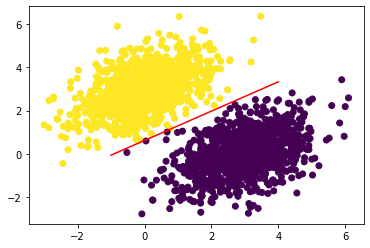

In [169]:
x = np.linspace(-1,4,1000)
y = -w[0]/w[1] * x + (0.5 - b)/w[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0], inputs[:,1], c = new_predictions[:,0] > 0.5)

# Keras Implementation

In [170]:
from tensorflow import keras


In [182]:
class SimpleDenseLayer(keras.layers.Layer):
    def __init__(self, activation, units):
        super().__init__()
        self.units = units
        self.activation = activation

def build(self, input_shape):
    self.w = self.add_weight(shape = (input_shape[-1],self.units), initializer = 'random_normal')
    self.b = self.add_weight(shape = (self.units, ), initializer = 'random_normal')
    
def call(self, inputs):
    result = tf.add(tf.matmul(inputs, self.w),self.b)
    if self.activation is not None:
        return self.activation(result)
    return result

In [183]:
my_dense = SimpleDenseLayer(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2, 784))
output_tensor= my_dense(input_tensor)
print(output_tensor)

tf.Tensor(
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]], shape=(2, 784), dtype=float32)


In [184]:
print(output_tensor.shape)

(2, 784)
